In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

In [3]:
( x_train, y_train), (x_test,y_test) = reuters.load_data(num_words=10000,test_split=0.2)
print(len(x_train))
print(len(x_test))
num_classes = np.max(y_train) +1
print(num_classes)

2110848/2110848 [==============================] - 14s 7us/step
8982
2246
46


In [4]:
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train,mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test,mode='binary')
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)
x_train.shape,x_test.shape
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [5]:
model = Sequential([
    Dense(512,input_shape = (10000,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
    
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120512   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 46)                23598     
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                                 
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',patience=3,verbose=1,mode='min')
model.compile(optimizer ='adam',
             loss= 'categorical_crossentropy',
             metrics = ['accuracy'])
h = model.fit(x_train, y_train,
             epochs=100,
             batch_size=32,
             validation_split=0.1,
             callbacks=[es])

Epoch 1/100
253/253 [==============================] - 7s 26ms/step - loss: 1.2850 - accuracy: 0.7200 - val_loss: 0.9442 - val_accuracy: 0.7842
Epoch 2/100
253/253 [==============================] - 6s 24ms/step - loss: 0.4853 - accuracy: 0.8896 - val_loss: 0.8584 - val_accuracy: 0.8242
Epoch 3/100
253/253 [==============================] - 6s 25ms/step - loss: 0.2842 - accuracy: 0.9362 - val_loss: 0.8917 - val_accuracy: 0.8076
Epoch 4/100
253/253 [==============================] - 7s 27ms/step - loss: 0.2140 - accuracy: 0.9504 - val_loss: 0.9914 - val_accuracy: 0.8009
Epoch 5/100
253/253 [==============================] - 8s 32ms/step - loss: 0.1993 - accuracy: 0.9529 - val_loss: 1.0110 - val_accuracy: 0.7953
Epoch 5: early stopping


In [7]:
model.evaluate(x_test,y_test,batch_size=32,verbose=1)

71/71 [==============================] - 1s 10ms/step - loss: 0.9428 - accuracy: 0.8005


[0.9428307414054871, 0.8005343079566956]

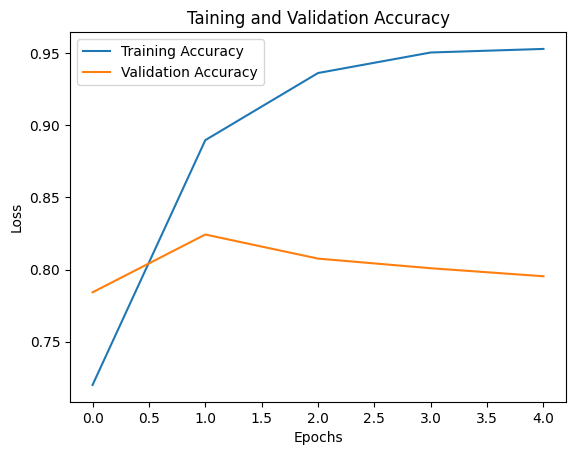

In [8]:
plt.plot(h.history['accuracy'],label='Training Accuracy')
plt.plot(h.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Taining and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

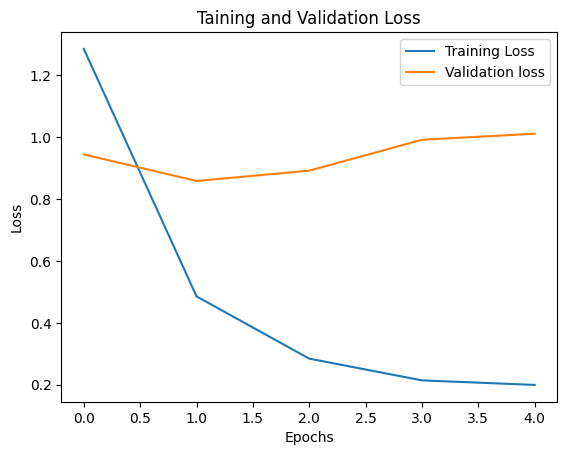

In [9]:
plt.plot(h.history['loss'],label='Training Loss')
plt.plot(h.history['val_loss'],label = 'Validation loss')
plt.title('Taining and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()